### Matched Catalog Analysis
This notebook generates a complete catalog of the original catalogs merged horizontally according to lyr matches


In [119]:
import sys
sys.path.append("./utils")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_loader import DataLoader

### Configurations

In [120]:
data_file_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_lyr/output/LR_Final_XJ_h20_erosita.txt"
input_catalog_file_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_raw/DAWN_EDFF_DR1.fits"
output_catalog_file_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_raw/eRASS1_Main.v1.1.fits"
data_output_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_final"

catalog_name = "h20_erosita"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [121]:
matched_catalog = np.genfromtxt(data_file_path)

matched_catalog_df = pd.DataFrame(
    matched_catalog,
    columns=[
        "OutID",
        "RAout",
        "DECout",
        "mag_out",
        "InID",
        "RAin",
        "DECin",
        "mag_in",
        "r",
        "f(r)",
        "df",
        "f(df)",
        "q(m)",
        "n(m)",
        "LR",
        "Rel",
        "flag"
    ]
)

matched_catalog_df.head()

,OutID,RAout,DECout,mag_out,InID,RAin,DECin,mag_in,r,f(r),df,f(df),q(m),n(m),LR,Rel,flag
0,151290.0,53.009634,-27.270768,0.0,702388.0,53.008852,-27.270497,0.0652,2.979,0.009037,0.0,1.0,0.3020,0.009869,0.27650,0.329,0.0
1,151290.0,53.009634,-27.270768,0.0,702458.0,53.010236,-27.271827,200.2298,4.387,0.000741,0.0,1.0,0.3021,0.009869,0.02267,0.027,0.0
2,151290.0,53.009634,-27.270768,0.0,702467.0,53.009470,-27.270024,0.1880,2.740,0.012560,0.0,1.0,0.3020,0.009869,0.38440,0.457,1.0
3,151303.0,53.196088,-27.176580,0.0,176205.0,53.196271,-27.176731,36.0398,0.854,0.064360,0.0,1.0,0.3020,0.009869,1.97000,0.802,1.0
4,151303.0,53.196088,-27.176580,0.0,176206.0,53.195561,-27.175980,-0.2791,2.877,0.010430,0.0,1.0,0.3020,0.009869,0.31910,0.130,0.0


In [122]:
best_matches_df = matched_catalog_df[
    matched_catalog_df['flag'] == 1.0
]

best_matches_df = best_matches_df.sort_values(by='OutID')
best_matches_df = best_matches_df.reset_index(drop=True)

best_matches_df.head(10)

,OutID,RAout,DECout,mag_out,InID,RAin,DECin,mag_in,r,f(r),df,f(df),q(m),n(m),LR,Rel,flag
0,151290.0,53.009634,-27.270768,0.0,702467.0,53.009470,-27.270024,0.1880,2.740,0.012560,0.0,1.0,0.3020,0.009869,0.38440,0.457,1.0
1,151303.0,53.196088,-27.176580,0.0,176205.0,53.196271,-27.176731,36.0398,0.854,0.064360,0.0,1.0,0.3020,0.009869,1.97000,0.802,1.0
2,151310.0,52.862168,-28.302076,0.0,585616.0,52.862462,-28.303094,20.7458,3.817,0.002289,0.0,1.0,0.3020,0.009869,0.07003,0.309,1.0
3,151328.0,52.209376,-27.202160,0.0,543596.0,52.209252,-27.202185,84.6650,0.456,0.073000,0.0,1.0,0.3021,0.009869,2.23400,0.563,1.0
4,151329.0,53.080047,-27.493224,0.0,549262.0,53.080099,-27.492295,0.4509,3.350,0.005124,0.0,1.0,0.3020,0.009869,0.15680,0.347,1.0
5,151330.0,52.598027,-28.425021,0.0,820988.0,52.598299,-28.425286,50.5348,1.369,0.048860,0.0,1.0,0.3020,0.009869,1.49500,0.905,1.0
6,151336.0,52.438212,-28.203696,0.0,311114.0,52.437710,-28.203157,22.3859,2.650,0.014110,0.0,1.0,0.3020,0.009869,0.43170,0.733,1.0
7,151337.0,53.108600,-27.675897,0.0,930184.0,53.108248,-27.676319,0.1195,1.978,0.029890,0.0,1.0,0.3020,0.009869,0.91460,0.746,1.0
8,151338.0,53.112387,-27.685369,0.0,929219.0,53.112548,-27.684814,36.9499,2.080,0.027030,0.0,1.0,0.3020,0.009869,0.82720,0.841,1.0
9,151344.0,52.792887,-27.279128,0.0,254168.0,52.793395,-27.279267,-2.0269,1.896,0.032250,0.0,1.0,0.3020,0.009869,0.98670,0.847,1.0


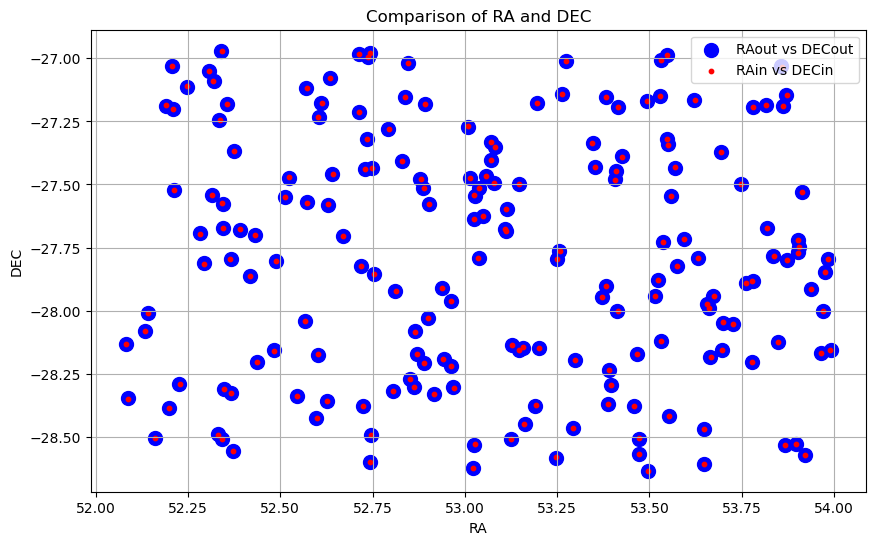

In [123]:
plt.figure(figsize=(10, 6))

plt.scatter(
    best_matches_df['RAout'], 
    best_matches_df['DECout'], 
    marker='o', 
    s=100,
    color='blue', 
    label='RAout vs DECout'
)
plt.scatter(
    best_matches_df['RAin'], 
    best_matches_df['DECin'], 
    marker='o', 
    s=10,
    color='red', 
    label='RAin vs DECin'
)

plt.title('Comparison of RA and DEC')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()
plt.grid(True)
plt.show()

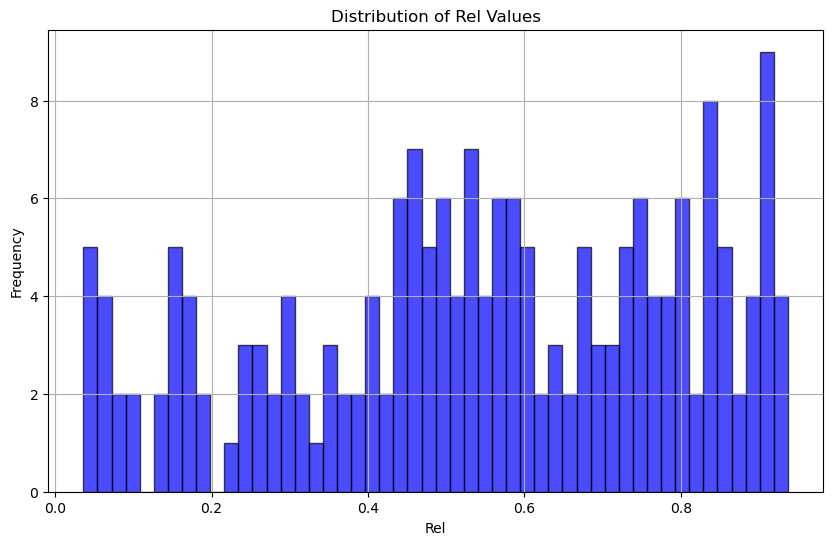

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(
    best_matches_df['Rel'], 
    bins=50, 
    color='blue', 
    edgecolor='black', 
    alpha=0.7
)

plt.title('Distribution of Rel Values')
plt.xlabel('Rel')
plt.ylabel('Frequency')
plt.grid(True)

# Display the plot
plt.show()

In [125]:
bestest_matches_df = best_matches_df
# [
#     best_matches_df['Rel'] >= 0.8
# ]

print(len(bestest_matches_df))
bestest_matches_df.head().reset_index(drop=True)

188


,OutID,RAout,DECout,mag_out,InID,RAin,DECin,mag_in,r,f(r),df,f(df),q(m),n(m),LR,Rel,flag
0,151290.0,53.009634,-27.270768,0.0,702467.0,53.009470,-27.270024,0.1880,2.740,0.012560,0.0,1.0,0.3020,0.009869,0.38440,0.457,1.0
1,151303.0,53.196088,-27.176580,0.0,176205.0,53.196271,-27.176731,36.0398,0.854,0.064360,0.0,1.0,0.3020,0.009869,1.97000,0.802,1.0
2,151310.0,52.862168,-28.302076,0.0,585616.0,52.862462,-28.303094,20.7458,3.817,0.002289,0.0,1.0,0.3020,0.009869,0.07003,0.309,1.0
3,151328.0,52.209376,-27.202160,0.0,543596.0,52.209252,-27.202185,84.6650,0.456,0.073000,0.0,1.0,0.3021,0.009869,2.23400,0.563,1.0
4,151329.0,53.080047,-27.493224,0.0,549262.0,53.080099,-27.492295,0.4509,3.350,0.005124,0.0,1.0,0.3020,0.009869,0.15680,0.347,1.0


### Building Combined Catalog

In [126]:
loader = DataLoader()

input_catalog = loader.get_dataframe(input_catalog_file_path)
output_catalog = loader.get_dataframe(output_catalog_file_path)

output_catalog = output_catalog.reset_index()
input_catalog = input_catalog.reset_index()

input_catalog = input_catalog.rename(columns={'index': 'InID'})
output_catalog = output_catalog.rename(columns={'index': 'OutID'})

print("length", len(output_catalog))
output_catalog.head()

length 930203


,OutID,IAUNAME,DETUID,SKYTILE,ID_SRC,UID,UID_Hard,ID_CLUSTER,RA,DEC,RA_RAW,DEC_RAW,RA_LOWERR,RA_UPERR,DEC_LOWERR,DEC_UPERR,POS_ERR,RADEC_ERR,LII,BII,ELON,ELAT,MJD,MJD_MIN,MJD_MAX,EXT,EXT_ERR,EXT_LOWERR,EXT_UPERR,EXT_LIKE,DET_LIKE_0,ML_CTS_1,ML_CTS_ERR_1,ML_CTS_LOWERR_1,ML_CTS_UPERR_1,ML_RATE_1,ML_RATE_ERR_1,ML_RATE_LOWERR_1,ML_RATE_UPERR_1,ML_FLUX_1,ML_FLUX_ERR_1,ML_FLUX_LOWERR_1,ML_FLUX_UPERR_1,ML_BKG_1,ML_EXP_1,ML_EEF_1,APE_CTS_1,APE_BKG_1,APE_EXP_1,APE_RADIUS_1,APE_POIS_1,DET_LIKE_P1,ML_CTS_P1,ML_CTS_ERR_P1,ML_CTS_LOWERR_P1,ML_CTS_UPERR_P1,ML_RATE_P1,ML_RATE_ERR_P1,ML_RATE_LOWERR_P1,ML_RATE_UPERR_P1,ML_FLUX_P1,ML_FLUX_ERR_P1,ML_FLUX_LOWERR_P1,ML_FLUX_UPERR_P1,ML_BKG_P1,ML_EXP_P1,ML_EEF_P1,APE_CTS_P1,APE_BKG_P1,APE_EXP_P1,APE_RADIUS_P1,APE_POIS_P1,DET_LIKE_P2,ML_CTS_P2,ML_CTS_ERR_P2,ML_CTS_LOWERR_P2,ML_CTS_UPERR_P2,ML_RATE_P2,ML_RATE_ERR_P2,ML_RATE_LOWERR_P2,ML_RATE_UPERR_P2,ML_FLUX_P2,ML_FLUX_ERR_P2,ML_FLUX_LOWERR_P2,ML_FLUX_UPERR_P2,ML_BKG_P2,ML_EXP_P2,ML_EEF_P2,APE_CTS_P2,APE_BKG_P2,APE_EXP_P2,APE_RADIUS_P2,APE_POIS_P2,DET_LIKE_P3,ML_CTS_P3,ML_CTS_ERR_P3,ML_CTS_LOWERR_P3,ML_CTS_UPERR_P3,ML_RATE_P3,ML_RATE_ERR_P3,ML_RATE_LOWERR_P3,ML_RATE_UPERR_P3,ML_FLUX_P3,ML_FLUX_ERR_P3,ML_FLUX_LOWERR_P3,ML_FLUX_UPERR_P3,ML_BKG_P3,ML_EXP_P3,ML_EEF_P3,APE_CTS_P3,APE_BKG_P3,APE_EXP_P3,APE_RADIUS_P3,APE_POIS_P3,DET_LIKE_P4,ML_CTS_P4,ML_CTS_ERR_P4,ML_CTS_LOWERR_P4,ML_CTS_UPERR_P4,ML_RATE_P4,ML_RATE_ERR_P4,ML_RATE_LOWERR_P4,ML_RATE_UPERR_P4,ML_FLUX_P4,ML_FLUX_ERR_P4,ML_FLUX_LOWERR_P4,ML_FLUX_UPERR_P4,ML_BKG_P4,ML_EXP_P4,ML_EEF_P4,APE_CTS_P4,APE_BKG_P4,APE_EXP_P4,APE_RADIUS_P4,APE_POIS_P4,DET_LIKE_P5,ML_CTS_P5,ML_CTS_ERR_P5,ML_CTS_LOWERR_P5,ML_CTS_UPERR_P5,ML_RATE_P5,ML_RATE_ERR_P5,ML_RATE_LOWERR_P5,ML_RATE_UPERR_P5,ML_FLUX_P5,ML_FLUX_ERR_P5,ML_FLUX_LOWERR_P5,ML_FLUX_UPERR_P5,ML_BKG_P5,ML_EXP_P5,ML_EEF_P5,APE_CTS_P5,APE_BKG_P5,APE_EXP_P5,APE_RADIUS_P5,APE_POIS_P5,DET_LIKE_P6,ML_CTS_P6,ML_CTS_ERR_P6,ML_CTS_LOWERR_P6,ML_CTS_UPERR_P6,ML_RATE_P6,ML_RATE_ERR_P6,ML_RATE_LOWERR_P6,ML_RATE_UPERR_P6,ML_FLUX_P6,ML_FLUX_ERR_P6,ML_FLUX_LOWERR_P6,ML_FLUX_UPERR_P6,ML_BKG_P6,ML_EXP_P6,ML_EEF_P6,APE_CTS_P6,APE_BKG_P6,APE_EXP_P6,APE_RADIUS_P6,APE_POIS_P6,DET_LIKE_P7,ML_CTS_P7,ML_CTS_ERR_P7,ML_CTS_LOWERR_P7,ML_CTS_UPERR_P7,ML_RATE_P7,ML_RATE_ERR_P7,ML_RATE_LOWERR_P7,ML_RATE_UPERR_P7,ML_FLUX_P7,ML_FLUX_ERR_P7,ML_FLUX_LOWERR_P7,ML_FLUX_UPERR_P7,ML_BKG_P7,ML_EXP_P7,ML_EEF_P7,APE_CTS_P7,APE_BKG_P7,APE_EXP_P7,APE_RADIUS_P7,APE_POIS_P7,DET_LIKE_P8,ML_CTS_P8,ML_CTS_ERR_P8,ML_CTS_LOWERR_P8,ML_CTS_UPERR_P8,ML_RATE_P8,ML_RATE_ERR_P8,ML_RATE_LOWERR_P8,ML_RATE_UPERR_P8,ML_FLUX_P8,ML_FLUX_ERR_P8,ML_FLUX_LOWERR_P8,ML_FLUX_UPERR_P8,ML_BKG_P8,ML_EXP_P8,ML_EEF_P8,APE_CTS_P8,APE_BKG_P8,APE_EXP_P8,APE_RADIUS_P8,APE_POIS_P8,DET_LIKE_P9,ML_CTS_P9,ML_CTS_ERR_P9,ML_CTS_LOWERR_P9,ML_CTS_UPERR_P9,ML_RATE_P9,ML_RATE_ERR_P9,ML_RATE_LOWERR_P9,ML_RATE_UPERR_P9,ML_FLUX_P9,ML_FLUX_ERR_P9,ML_FLUX_LOWERR_P9,ML_FLUX_UPERR_P9,ML_BKG_P9,ML_EXP_P9,ML_EEF_P9,APE_CTS_P9,APE_BKG_P9,APE_EXP_P9,APE_RADIUS_P9,APE_POIS_P9,APE_CTS_S,APE_BKG_S,APE_EXP_S,APE_POIS_S,FLAG_SP_SNR,FLAG_SP_BPS,FLAG_SP_SCL,FLAG_SP_LGA,FLAG_SP_GC_CONS,FLAG_NO_RADEC_ERR,FLAG_NO_EXT_ERR,FLAG_NO_CTS_ERR,FLAG_OPT
0,0,1eRASS J002937.2-310209,eb01_009120_020_ML00003_002_c010,9120,3,100912000003,200912000004,2,7.405249,-31.036103,7.405692,-31.035628,0.862056,0.944134,0.747086,0.732261,1.367573,1.277169,352.285584,-83.838559,353.038170,-31.128088,59002.515625,59002.179688,59003.015625,0.000000,0.000000,0.000000,0.000000,0.000000,792.535339,178.306870,13.893217,13.500502,14.285933,1.665662,0.129784,0.126116,0.133453,1.550895e-12,1.208418e-13,1.174260e-13,1.242576e-13,0.611076,107.048668,0.883602,136,0.297771,107.044205,7.477509,0.0,232.818756,53.531761,7.542389,7.139240,7.945539,0.492878,0.069444,0.065732,0.073156,5.347488e-13,7.534375e-14,7.131654e-14,7.937097e-14,0.182306,108.610573,0.892302,38,0.124088,108.610268,6.948209,0.000000e+00,289.129486,65.438179,8.453674,8.069227,8.838122,0.600661,0.077597,0.074068,0.081126,4.419874e-13,5.709

In [127]:
print("length", len(input_catalog))
input_catalog.head()

length 1062645


,InID,ID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,GROUP_ID,N_GROUP,MODEL_FLAG,SOLUTION_MODEL,EBV_MW,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_MAG,CFHT_u_MAGERR,CFHT_u_CHISQ,CFHT_u_DRIFT,CFHT_u_VALID,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_MAG,HSC_g_MAGERR,HSC_g_CHISQ,HSC_g_DRIFT,HSC_g_VALID,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_MAG,HSC_r_MAGERR,HSC_r_CHISQ,HSC_r_DRIFT,HSC_r_VALID,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_MAG,HSC_i_MAGERR,HSC_i_CHISQ,HSC_i_DRIFT,HSC_i_VALID,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_MAG,HSC_z_MAGERR,HSC_z_CHISQ,HSC_z_DRIFT,HSC_z_VALID,HSC_NB0816_MAG,HSC_NB0816_MAGERR,HSC_NB0816_FLUX,HSC_NB0816_FLUXERR,HSC_NB0816_CHISQ,HSC_NB0816_DRIFT,HSC_NB0816_VALID,HSC_NB0921_MAG,HSC_NB0921_MAGERR,HSC_NB0921_FLUX,HSC_NB0921_FLUXERR,HSC_NB0921_CHISQ,HSC_NB0921_DRIFT,HSC_NB0921_VALID,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_MAG,IRAC_CH1_MAGERR,IRAC_CH1_CHISQ,IRAC_CH1_DRIFT,IRAC_CH1_VALID,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_MAG,IRAC_CH2_MAGERR,IRAC_CH2_CHISQ,IRAC_CH2_DRIFT,IRAC_CH2_VALID,lp_zPDF,lp_zPDF_l68,lp_zPDF_u68,lp_zMinChi2,lp_chi2_best,lp_zp_2,lp_chi2_2,lp_NbFilt,lp_zq,lp_chiq,lp_modq,lp_mods,lp_chis,lp_model,lp_age,lp_dust,lp_Attenuation,lp_MNUV,lp_MR,lp_MJ,lp_mass_med,lp_mass_med_min68,lp_mass_med_max68,lp_mass_best,lp_SFR_med,lp_SFR_med_min68,lp_SFR_med_max68,lp_SFR_best,lp_sSFR_med,lp_sSFR_med_min68,lp_sSFR_med_max68,lp_sSFR_best,ez_z_phot,ez_z_phot_chi2,ez_z_phot_risk,ez_z_min_risk,ez_min_risk,ez_z_raw_chi2,ez_raw_chi2,ez_z_ml,ez_z_ml_chi2,ez_z_ml_risk,ez_z025,ez_z160,ez_z500,ez_z840,ez_z975,ez_nusefilt,ez_lc_min,ez_lc_max,ez_star_min_chi2,ez_star_teff
0,0,1,52.357832,-28.015619,30860.257400,13805.184308,0.085609,0.078303,52.357813,-28.015630,84_10000,7133,1,0.0,DevGalaxy,0.008067,0.244099,0.038200,25.431085,0.170423,0.855771,0.000137,True,0.241856,0.016933,25.441109,0.076242,0.838295,0.002879,True,0.367419,0.018993,24.987096,0.056295,1.214715,0.001433,True,0.553794,0.019933,24.541628,0.039197,0.881066,0.001825,True,0.572930,0.127948,24.504746,0.243198,1.174499,0.000455,True,24.179534,0.288425,0.773012,0.204735,0.994490,0.000235,True,24.766254,0.289006,0.450296,0.119503,0.993660,0.000333,True,0.248496,0.023791,25.411703,0.104259,0.461124,0.002720,True,0.332080,0.024589,25.096892,0.080635,0.345424,0.002907,True,0.2739,0.2271,0.4957,0.2508,3.119610,0.58,8.40127,7,0.10,14.6487,1,140,28.79240,9,5.000000e+07,0.4,1,-14.39824,-15.87910,-15.92102,7.31936,7.10996,7.51830,6.97556,-1.07858,-1.41111,-0.76005,-0.3699,-8.38682,-8.92388,-7.90127,-7.345,0.263709,7.140742,0.286292,0.246077,0.284072,0.221403,6.836875e+00,0.219051,6.828080,0.290870,0.067486,0.155573,0.263709,0.503743,0.647144,7,3640.981999,45020.337852,9.676304,4800.0
1,1,2,52.319698,-28.015597,31581.719675,13802.165124,0.024598,0.023457,52.319718,-28.015598,84_10001,7117,1,0.0,ExpGalaxy,0.008453,0.580868,0.023028,24.489807,0.043172,1.006324,0.003965,True,0.641079,0.010144,24.382721,0.017231,1.058447,0.019112,True,0.766861,0.012455,24.188208,0.017687,1.130228,0.007700,True,1.382581,0.012933,23.548273,0.010186,1.330757,0.005565,True,1.625042,0.079703,23.372839,0.053412,1.210985,0.004524,True,23.686655,0.125781,1.217133,0.140581,1.036741,0.000713,True,23.346758,0.052938,1.664550,0.080916,0.959715,0.000403,True,1.374851,0.019157,23.554361,0.015174,0.982006,0.035655,True,1.219494,0.019209,23.684551,0.017153,0.456101,0.032404,True,0.8300,0.7862,0.8732,0.8332,17.081100,NaN,NaN,7,0.00,92.6700,4,225,368.73700,5,6.405000e+08,0.1,1,-18.62216,-19.53033,-19.46875,8.88403,8.81660,8.95326,8.89260,0.21810,-0.01433,0.31627,0.2267,-8.65482,-8.99191,-8.53425,-8.666,0.817779,17.086884,0.091938,0.822119,0.091774,0.803988,1.698096e+01,0.807446,16.973167,0.093952,0.108311,0.767913,0.817779,0.866753,0.913370,7,3640.981999,45020.337852,285.494263,4000.0
2,2,3,52.440821,-28.015964,29290.181053,13804.580551,0.020469,0.019597,52.440827,-28.015956,84_10002,7128,1,0.0,DevGalaxy,0.008042,0.352241,0.018886,25.032899,0.058387,0.614941,0.003633,True,0.598796,0.008

In [128]:
matched_pairs = bestest_matches_df[['OutID', 'InID']]
matched_pairs.head(100)

,OutID,InID
0,151290.0,702467.0
1,151303.0,176205.0
2,151310.0,585616.0
3,151328.0,543596.0
4,151329.0,549262.0
5,151330.0,820988.0
6,151336.0,311114.0
7,151337.0,930184.0
8,151338.0,929219.0
9,151344.0,254168.0


In [129]:
input_catalog['InID'] = input_catalog['InID'].astype(int)
output_catalog['OutID'] = output_catalog['OutID'].astype(int)
matched_pairs = matched_pairs.astype(int)

merged_catalog = pd.merge(matched_pairs, input_catalog, on='InID')
final_catalog = pd.merge(merged_catalog, output_catalog, on='OutID')

final_catalog.head()

,OutID,InID,ID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,GROUP_ID,N_GROUP,MODEL_FLAG,SOLUTION_MODEL,EBV_MW,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_MAG,CFHT_u_MAGERR,CFHT_u_CHISQ,CFHT_u_DRIFT,CFHT_u_VALID,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_MAG,HSC_g_MAGERR,HSC_g_CHISQ,HSC_g_DRIFT,HSC_g_VALID,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_MAG,HSC_r_MAGERR,HSC_r_CHISQ,HSC_r_DRIFT,HSC_r_VALID,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_MAG,HSC_i_MAGERR,HSC_i_CHISQ,HSC_i_DRIFT,HSC_i_VALID,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_MAG,HSC_z_MAGERR,HSC_z_CHISQ,HSC_z_DRIFT,HSC_z_VALID,HSC_NB0816_MAG,HSC_NB0816_MAGERR,HSC_NB0816_FLUX,HSC_NB0816_FLUXERR,HSC_NB0816_CHISQ,HSC_NB0816_DRIFT,HSC_NB0816_VALID,HSC_NB0921_MAG,HSC_NB0921_MAGERR,HSC_NB0921_FLUX,HSC_NB0921_FLUXERR,HSC_NB0921_CHISQ,HSC_NB0921_DRIFT,HSC_NB0921_VALID,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_MAG,IRAC_CH1_MAGERR,IRAC_CH1_CHISQ,IRAC_CH1_DRIFT,IRAC_CH1_VALID,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_MAG,IRAC_CH2_MAGERR,IRAC_CH2_CHISQ,IRAC_CH2_DRIFT,IRAC_CH2_VALID,lp_zPDF,lp_zPDF_l68,lp_zPDF_u68,lp_zMinChi2,lp_chi2_best,lp_zp_2,lp_chi2_2,lp_NbFilt,lp_zq,lp_chiq,lp_modq,lp_mods,lp_chis,lp_model,lp_age,lp_dust,lp_Attenuation,lp_MNUV,lp_MR,lp_MJ,lp_mass_med,lp_mass_med_min68,lp_mass_med_max68,lp_mass_best,lp_SFR_med,lp_SFR_med_min68,lp_SFR_med_max68,lp_SFR_best,lp_sSFR_med,lp_sSFR_med_min68,lp_sSFR_med_max68,lp_sSFR_best,ez_z_phot,ez_z_phot_chi2,ez_z_phot_risk,ez_z_min_risk,ez_min_risk,ez_z_raw_chi2,ez_raw_chi2,ez_z_ml,ez_z_ml_chi2,ez_z_ml_risk,ez_z025,ez_z160,ez_z500,ez_z840,ez_z975,ez_nusefilt,ez_lc_min,ez_lc_max,ez_star_min_chi2,ez_star_teff,IAUNAME,DETUID,SKYTILE,ID_SRC,UID,UID_Hard,ID_CLUSTER,RA,DEC,RA_RAW,DEC_RAW,RA_LOWERR,RA_UPERR,DEC_LOWERR,DEC_UPERR,POS_ERR,RADEC_ERR,LII,BII,ELON,ELAT,MJD,MJD_MIN,MJD_MAX,EXT,EXT_ERR,EXT_LOWERR,EXT_UPERR,EXT_LIKE,DET_LIKE_0,ML_CTS_1,ML_CTS_ERR_1,ML_CTS_LOWERR_1,ML_CTS_UPERR_1,ML_RATE_1,ML_RATE_ERR_1,ML_RATE_LOWERR_1,ML_RATE_UPERR_1,ML_FLUX_1,ML_FLUX_ERR_1,ML_FLUX_LOWERR_1,ML_FLUX_UPERR_1,ML_BKG_1,ML_EXP_1,ML_EEF_1,APE_CTS_1,APE_BKG_1,APE_EXP_1,APE_RADIUS_1,APE_POIS_1,DET_LIKE_P1,ML_CTS_P1,ML_CTS_ERR_P1,ML_CTS_LOWERR_P1,ML_CTS_UPERR_P1,ML_RATE_P1,ML_RATE_ERR_P1,ML_RATE_LOWERR_P1,ML_RATE_UPERR_P1,ML_FLUX_P1,ML_FLUX_ERR_P1,ML_FLUX_LOWERR_P1,ML_FLUX_UPERR_P1,ML_BKG_P1,ML_EXP_P1,ML_EEF_P1,APE_CTS_P1,APE_BKG_P1,APE_EXP_P1,APE_RADIUS_P1,APE_POIS_P1,DET_LIKE_P2,ML_CTS_P2,ML_CTS_ERR_P2,ML_CTS_LOWERR_P2,ML_CTS_UPERR_P2,ML_RATE_P2,ML_RATE_ERR_P2,ML_RATE_LOWERR_P2,ML_RATE_UPERR_P2,ML_FLUX_P2,ML_FLUX_ERR_P2,ML_FLUX_LOWERR_P2,ML_FLUX_UPERR_P2,ML_BKG_P2,ML_EXP_P2,ML_EEF_P2,APE_CTS_P2,APE_BKG_P2,APE_EXP_P2,APE_RADIUS_P2,APE_POIS_P2,DET_LIKE_P3,ML_CTS_P3,ML_CTS_ERR_P3,ML_CTS_LOWERR_P3,ML_CTS_UPERR_P3,ML_RATE_P3,ML_RATE_ERR_P3,ML_RATE_LOWERR_P3,ML_RATE_UPERR_P3,ML_FLUX_P3,ML_FLUX_ERR_P3,ML_FLUX_LOWERR_P3,ML_FLUX_UPERR_P3,ML_BKG_P3,ML_EXP_P3,ML_EEF_P3,APE_CTS_P3,APE_BKG_P3,APE_EXP_P3,APE_RADIUS_P3,APE_POIS_P3,DET_LIKE_P4,ML_CTS_P4,ML_CTS_ERR_P4,ML_CTS_LOWERR_P4,ML_CTS_UPERR_P4,ML_RATE_P4,ML_RATE_ERR_P4,ML_RATE_LOWERR_P4,ML_RATE_UPERR_P4,ML_FLUX_P4,ML_FLUX_ERR_P4,ML_FLUX_LOWERR_P4,ML_FLUX_UPERR_P4,ML_BKG_P4,ML_EXP_P4,ML_EEF_P4,APE_CTS_P4,APE_BKG_P4,APE_EXP_P4,APE_RADIUS_P4,APE_POIS_P4,DET_LIKE_P5,ML_CTS_P5,ML_CTS_ERR_P5,ML_CTS_LOWERR_P5,ML_CTS_UPERR_P5,ML_RATE_P5,ML_RATE_ERR_P5,ML_RATE_LOWERR_P5,ML_RATE_UPERR_P5,ML_FLUX_P5,ML_FLUX_ERR_P5,ML_FLUX_LOWERR_P5,ML_FLUX_UPERR_P5,ML_BKG_P5,ML_EXP_P5,ML_EEF_P5,APE_CTS_P5,APE_BKG_P5,APE_EXP_P5,APE_RADIUS_P5,APE_POIS_P5,DET_LIKE_P6,ML_CTS_P6,ML_CTS_ERR_P6,ML_CTS_LOWERR_P6,ML_CTS_UPERR_P6,ML_RATE_P6,ML_RATE_ERR_P6,ML_RATE_LOWERR_P6,ML_RATE_UPERR_P6,ML_FLUX_P6,ML_FLUX_ERR_P6,ML_FLUX_LOWERR_P6,ML_FLUX_UPERR_P6,ML_BKG_P6,ML_EXP_P6,ML_EEF_P6,APE_CTS_P6,APE_BKG_P6,APE_EXP_P6,APE_RADIUS_P6,APE_POIS_P6,DET_LIKE_P7,ML_CTS_P7,ML_CTS_ERR_P7,ML_CTS_LOWERR_P7,ML_CTS_UPERR_P7,ML_RATE_P7,ML_RATE_ERR_P7,ML_RATE_LOWERR_P7,ML_RATE_UPERR_P7,ML_FLUX_P7,ML_FLUX_ERR_P7,ML_FLUX_LOWERR_P7,ML_FLUX_UPERR_P7,ML_BKG_P7,ML_EXP_P7,ML_

In [130]:
final_catalog.to_csv(f"{data_output_path}/merged_catalog_{catalog_name}.csv", index=False)